# Predict a song's speechiness based on its features :)

I'll be using the [Twenty One Pilots Discography](https://www.kaggle.com/datasets/federicoseijo/twenty-one-pilots-discography) dataset by Federico Seijo.
This dataset contains 26 different columns: *album_release_date, album_release_year, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, disc_number, duration_ms, explicit, is_local, track_name, track_number, type, album_name, key_name, mode_name, key_mode*

With this dataset, I'll train a linear and polynomial regression model that will predict the speechiness of songs based on the features' information :)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

## Dataset preprocessing

We'll extract the dataset and run a couple of queries to clean the data and prepare it for use.

In [4]:
df = pd.read_csv('twentyscience.csv')
df

,Unnamed: 0,album_release_date,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,duration_ms,explicit,is_local,track_name,track_number,type,album_name,key_name,mode_name,key_mode
0,1,2021-05-21,2021,0.684,0.677,7,-7.355,1,0.0401,0.110000,...,204400,False,False,Good Day,1,track,Scaled And Icy,G,major,G major
1,2,2021-05-21,2021,0.700,0.664,7,-8.211,1,0.0394,0.306000,...,223065,False,False,Choker,2,track,Scaled And Icy,G,major,G major
2,3,2021-05-21,2021,0.588,0.856,9,-5.242,0,0.0316,0.000818,...,175044,False,False,Shy Away,3,track,Scaled And Icy,A,minor,A minor
3,4,2021-05-21,2021,0.785,0.623,11,-6.923,1,0.0403,0.050500,...,216758,False,False,The Outside,4,track,Scaled And Icy,B,major,B major
4,5,2021-05-21,2021,0.687,0.890,8,-5.990,1,0.0344,0.003960,...,172232,False,False,Saturday,5,track,Scaled And Icy,G#,major,G# major
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,2009-12-29,2009,0.550,0.625,1,-8.213,0,0.0399,0.149000,...,277013,False,False,Trapdoor,10,track,Twenty One Pilots,C#,minor,C# minor
126,127,2009-12-29,2009,0.618,0.732,5,-4.609,1,0.0724,0.147000,...,273786,False,False,"A Car, A Torch, A Death",11,track,Twenty One Pilots,F,major,F major
127,128,2009-12-29,2009,0.567,0.572,9,-7.694,1,0.0318,0.166000,...,285733,False,False,Taxi Cab,12,track,Twenty One Pilots,A,major,A major
128,129,2009-12-29,2009,0.363,0.135,7,-11.166,0,0.0295,0.976000,...,233000,False,False,Before You Start Your Day,13,track,Twenty One Pilots,G,minor,G minor


In [5]:
df.dtypes

Unnamed: 0              int64
album_release_date     object
album_release_year      int64
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
time_signature          int64
disc_number             int64
duration_ms             int64
explicit                 bool
is_local                 bool
track_name             object
track_number            int64
type                   object
album_name             object
key_name               object
mode_name              object
key_mode               object
dtype: object

Here, we are deleting the columns we won't be using from the dataset:

In [6]:
df.drop(["Unnamed: 0", 'time_signature', 'album_release_date',
         'disc_number', 'is_local', 'track_number', 'type',
         'key_name', 'mode_name', 'key_mode', 'track_name', 
         'album_name', 'album_release_year'], axis=1, inplace=True)

And chaging the binary column as bool for an easiest process of the data:

In [7]:
df['explicit'] = df['explicit'].astype(bool)

Now that we have chosen the columns to work with, we can continue preparing the dataset in terms of missing and null data:

In [8]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
explicit            0
dtype: int64

Since there is no missing or null data, we can start working on the dataset :)

### Defining and separating independent variables from dependent variables (speechiness)

In [9]:
X = df.drop('speechiness', axis=1)
y = df['speechiness']

X

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit
0,0.684,0.677,7,-7.355,1,0.110000,0.009750,0.3400,0.370,142.048,204400,False
1,0.700,0.664,7,-8.211,1,0.306000,0.000019,0.2490,0.585,142.009,223065,False
2,0.588,0.856,9,-5.242,0,0.000818,0.073900,0.2380,0.635,96.966,175044,False
3,0.785,0.623,11,-6.923,1,0.050500,0.125000,0.0539,0.711,100.991,216758,False
4,0.687,0.890,8,-5.990,1,0.003960,0.000939,0.0436,0.854,113.060,172232,False
...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.550,0.625,1,-8.213,0,0.149000,0.000000,0.1610,0.317,149.927,277013,False
126,0.618,0.732,5,-4.609,1,0.147000,0.000009,0.0925,0.444,140.086,273786,False
127,0.567,0.572,9,-7.694,1,0.166000,0.000000,0.1030,0.205,138.062,285733,False
128,0.363,0.135,7,-11.166,0,0.976000,0.000265,0.1070,0.195,98.450,233000,False


### Splitting the dataset between training and testing

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling

In [11]:

scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)


## Testing different models
### Linear Regression

In [12]:
model = LinearRegression()
model.fit(xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
#ypred_linear = model.predict(xtest_scaled)
ypred_linear = model.predict(xtest)

mse_linear = mean_squared_error(ytest, ypred_linear)

#score_linear = model.score(xtest_scaled, ytest)
score_linear = model.score(xtest, ytest)

print("Score:", score_linear)
print("MSE:", mse_linear)

Score: 0.8986369887579797
MSE: 0.005900326165769031


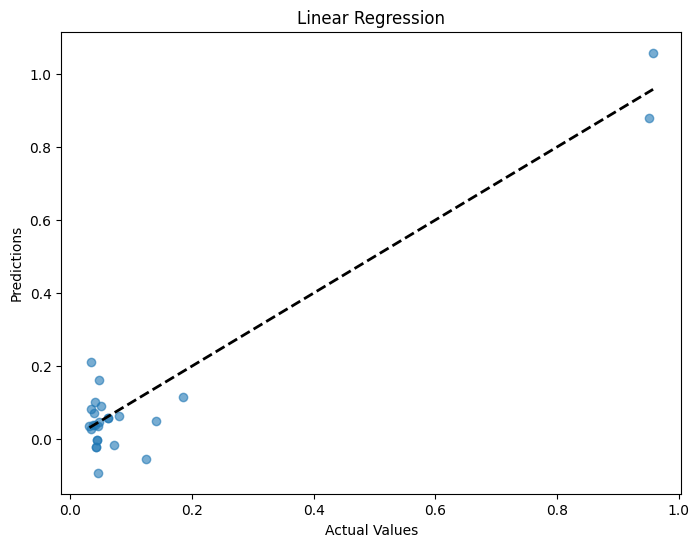

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred_linear, alpha=0.6)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')
plt.show()

### Polynomial Regression 

In [15]:
poly = PolynomialFeatures(degree = 3)
xtrain_poly = poly.fit_transform(xtrain_scaled)
xtest_poly = poly.transform(xtest_scaled)

#xtrain_poly = poly.fit_transform(xtrain)
#xtest_poly = poly.transform(xtest)

# training
poly_model = LinearRegression()
poly_model.fit(xtrain_poly, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
# predictions
ypred_poly = poly_model.predict(xtest_poly)
mse_poly = mean_squared_error(ytest, ypred_poly)
score_poly = poly_model.score(xtest_poly, ytest)

print("Score:", score_poly)
print("MSE:", mse_poly)

Score: 0.9001889649232755
MSE: 0.005809985858545122


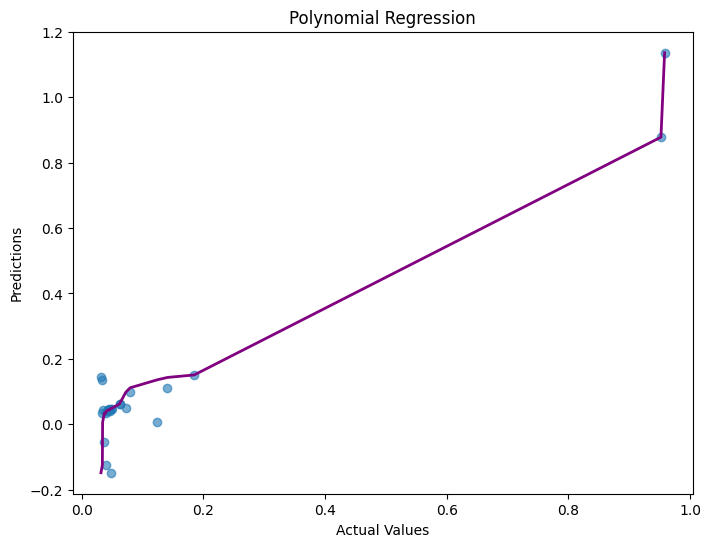

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred_poly, alpha=0.6)
plt.plot(sorted(ytest), sorted(ypred_poly), color='purple', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Polynomial Regression')
plt.show()

## Comparing models with different metrics

In [18]:
r2_linear = r2_score(ytest, ypred_linear)
r2_poly = r2_score(ytest, ypred_poly)

mae_linear = mean_absolute_error(ytest, ypred_linear)
mae_poly = mean_absolute_error(ytest, ypred_poly)

data = {
    'Model': ['Linear Regression', 'Polynomial Regression'],
    'Score': [score_linear,score_poly],
    'MSE': [mse_linear, mse_poly],
    'MAE': [mae_linear, mae_poly],
    'R^2': [r2_linear, r2_poly]
}

metrics_df = pd.DataFrame(data)

metrics_df



,Model,Score,MSE,MAE,R^2
0,Linear Regression,0.898637,0.00590,0.057026,0.898637
1,Polynomial Regression,0.900189,0.00581,0.044749,0.900189


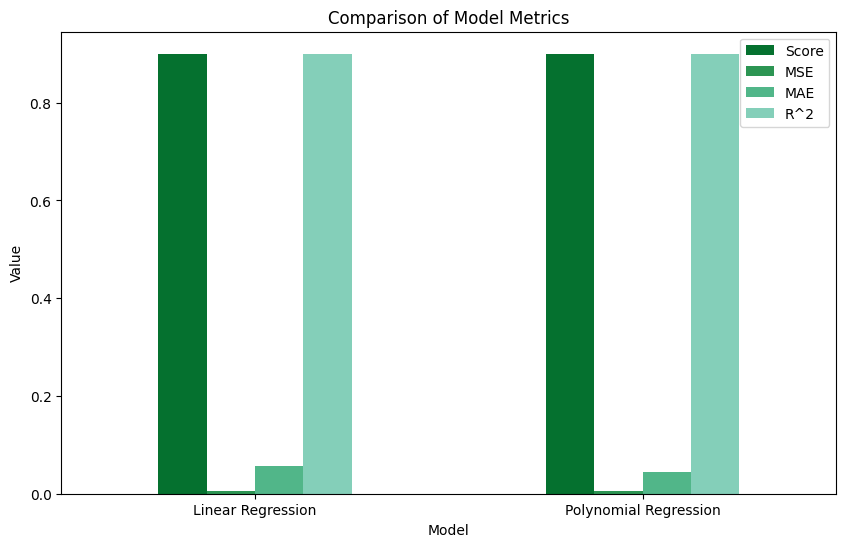

In [21]:
sns.set_palette('BuGn_r') 
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Model Metrics')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

Both models performed very well on the dataset, achieving high scores and low error metrics. Polynomial Regression slightly outperformed Linear Regression, showing a lower MSE and MAE as well as a marginally higher R². Overall, the results demonstrate that both approaches are suitable for this dataset.